In [1]:
import  tensorflow as tf

F:\dev\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
F:\dev\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
F:\dev\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
F:\dev\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type

In [2]:
print(tf.__version__)

1.12.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('./dataset/credit-a.csv',header = None)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.83,0.000,0,0,9,0,1.25,0,0,1,1,0,202,0.0,-1
1,1,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560.0,-1
2,1,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824.0,-1
3,0,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3.0,-1
4,0,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0.0,-1


In [6]:
data.iloc[:, -1].value_counts()

 1    357
-1    296
Name: 15, dtype: int64

In [7]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1].replace(-1,0)

In [8]:
model = tf.keras.Sequential()

In [9]:
model.add(tf.keras.layers.Dense(4, input_shape=(15,),activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 64        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['acc']
             )

In [12]:
history = model.fit(x,y,epochs=100)

Epoch 1/100
653/653 [==============================] - 0s 481us/step - loss: 5.3460 - acc: 0.5559
Epoch 2/100
653/653 [==============================] - 0s 49us/step - loss: 4.6813 - acc: 0.4962
Epoch 3/100
653/653 [==============================] - 0s 52us/step - loss: 4.4763 - acc: 0.4946
Epoch 4/100
653/653 [==============================] - 0s 43us/step - loss: 4.2403 - acc: 0.4885
Epoch 5/100
653/653 [==============================] - 0s 41us/step - loss: 3.9895 - acc: 0.4885
Epoch 6/100
653/653 [==============================] - 0s 53us/step - loss: 3.5251 - acc: 0.4931
Epoch 7/100
653/653 [==============================] - 0s 41us/step - loss: 1.7227 - acc: 0.5804
Epoch 8/100
653/653 [==============================] - 0s 47us/step - loss: 1.1089 - acc: 0.6202
Epoch 9/100
653/653 [==============================] - 0s 44us/step - loss: 0.9621 - acc: 0.6447
Epoch 10/100
653/653 [==============================] - 0s 49us/step - loss: 0.9247 - acc: 0.6141
Epoch 11/100
653/653 [======

In [13]:
history.history.keys()

dict_keys(['loss', 'acc'])

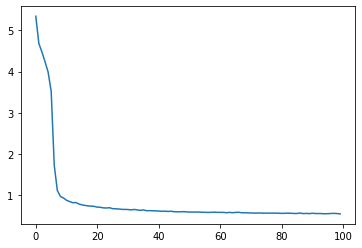

In [14]:
plt.plot(history.epoch,history.history.get('loss'))

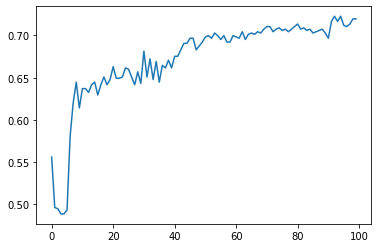

In [15]:
plt.plot(history.epoch,history.history.get('acc'))